In [56]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten # Core Layers
from keras.layers import Convolution2D, MaxPooling2D, Conv2D # CNN Layers
from keras.utils import np_utils
from keras import backend as K

In [2]:
# Load image data from MNIST
from keras.datasets import mnist

# Pre-shuffled MNIST data
(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


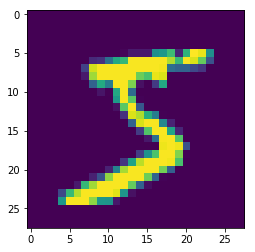

In [5]:
# 60000 entries, 28x28 pixels each

# Look at first sample
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [61]:
input_shape = None
# input image dimensions
img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
# Pre-process input data

#convert data type to float32 and normalize data values to the range [0, 1].
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# shape of class label data
print(y_train.shape)

(60000,)


In [12]:
print(y_train[10:])

[3 5 3 ... 5 6 8]


In [14]:
# Preprocess class labels
# Convert 1D array to 10D class matrices (1 for each digit)

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [15]:
print(Y_train.shape)
print(Y_train[10:])

(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [16]:
print(Y_test.shape)
print(Y_test[10:])

(10000, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [68]:
# Define model architecture
model = Sequential()

# CNN Input Layer: 
## - First 3 parameters: # convolution filters to use, # of rows in each convolution kernel, 
##                       # of columns in each convolution kernel.
## - Input shape should be the shape of 1 sample: 
##                       (1, 28, 28) that corresponds to  the (depth, width, height) of each digit image.
## - Step size is (1,1) by default, can be tuned using the 'subsample' parameter.



model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

print(model.output_shape) 

(None, 26, 26, 32)


In [69]:
# Add more layers

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout prevents overfitting

In [70]:
# weights from the Convolution layers must be flattened (made 1-dimensional) 
#before passing them to the fully connected Dense layer.
model.add(Flatten())

# Fully connected dense layers
model.add(Dense(128, activation='relu')) # For Dense layers, the first parameter is the output size of the layer.
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # Final output = 10, one for each digit

In [71]:
# Compile the model
model.compile(loss='categorical_crossentropy', # loss function
              optimizer='adam', # optimizer
              metrics=['accuracy'])

In [72]:
# Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

C:\Users\Najla\Anaconda3\envs\deeplearning\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.1853 - acc: 0.9434
Epoch 2/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0791 - acc: 0.9759 0s - loss: 0.0791 - acc: 0.9 - ETA: 0s - loss: 0.0790 - acc:
Epoch 3/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0626 - acc: 0.9811
Epoch 4/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0520 - acc: 0.9835
Epoch 5/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0452 - acc: 0.9858
Epoch 6/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0404 - acc: 0.9872
Epoch 7/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0338 - acc: 0.9890: 1s - loss: 0.0339 -  - ETA: 0s - loss: 0.03
Epoch 8/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0322 - acc: 0.9900
Epoch 9/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0284 - acc

In [73]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [74]:
print(score) # loss, accuracy

[0.029446220242658454, 0.9924]
